# Solving MIS on a unit disk with Aquila

## In this notebook, you will solve the so called maximum independent set (MIS) problem on a unit disk graph with QuEra's Aquila

In [1]:
from braket.ahs.atom_arrangement import AtomArrangement

from ahs_utils import get_drive, show_register, show_global_drive, show_final_avg_density 

from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

from braket.devices import LocalSimulator

import numpy as np
import matplotlib.pyplot as plt

## Suppose we are interested in solving the MIS problem for a ring graph with an additional vertex. Before we run a large example on Aquila, we would like to test a small example on a local simulator. 


<div>
    <img src="ring_graph.png" width="400"/>
</div>    

In [2]:
separation = 6.1e-6  # in meters 

positions = separation * np.array(
    [[0, 0], [1, 0], 
     [3/2, np.sqrt(3)/2], [3/2, -np.sqrt(3)/2], 
     [5/2, np.sqrt(3)/2], [5/2, -np.sqrt(3)/2], [3, 0]]
)

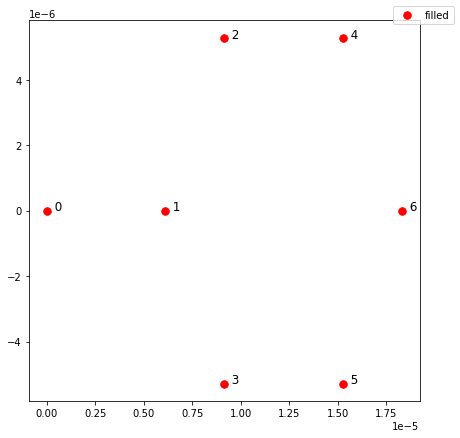

In [3]:
#### Fill in this cell to realize and plot the atomic arrangment shown above 

register = AtomArrangement()
for position in positions:
    register.add([position[0], position[1]])
    
show_register(register)

## Let's now define the time-dependent parameters as shown below


<div>
    <img src="waveforms.png" width="400"/>
</div>    

In [4]:
time_points = [0, 2.5e-7, 2.75e-6, 3e-6]
amplitude_min = 0
amplitude_max = 1.57e7  # rad / s

detuning_min = -5.5e7  # rad / s
detuning_max = 5.5e7  # rad / s



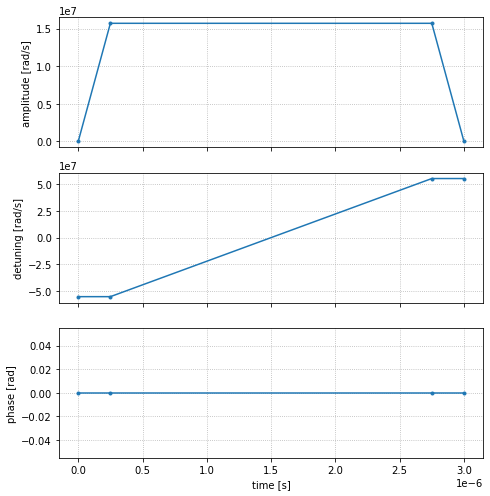

In [5]:
#### Fill in this cell to realize the drive Hamiltonian


amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_min]  # piecewise linear
detuning_values = [detuning_min, detuning_min, detuning_max, detuning_max]  # piecewise linear
phase_values = [0, 0, 0, 0]  # piecewise constant


drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)
show_global_drive(drive);

## Finally we can combine the register and drive Hamiltonian to form an AHS program

In [6]:
#### Fill in this cell to combine the register and drive Hamiltonian to form an AHS program

ahs_program = AnalogHamiltonianSimulation(
    register=register, 
    hamiltonian=drive
)

## With the AHS program defined, we can run it on the local simulator

In [7]:
#### Fill in this cell to define the device as the local simulator
device = LocalSimulator("braket_ahs")

In [8]:
#### Fill in this cell to submit the task to the device
task = device.run(ahs_program, shots=100)

In [9]:
#### Fill in this cell to collect the result from the task
result = task.result()

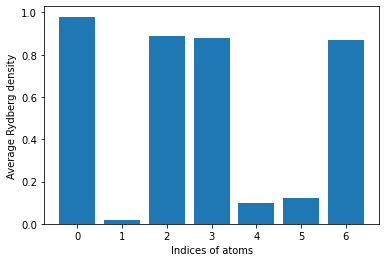

In [10]:
#### Fill in this cell to plot the final average Rydberg density
show_final_avg_density(result)

## The result looks pretty good! You are (almost) ready to submit the program to Aquila!
Please refer to [this example](https://github.com/aws/amazon-braket-examples/blob/main/examples/analog_hamiltonian_simulation/01_Introduction_to_Aquila.ipynb) for further introduction of Aquila.
